### Libraries import

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from pywaffle import Waffle

### Style

In [39]:
from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

### Data import

In [40]:
dataset = pd.read_csv('./../data/fuoriuscita/vittime_1522/Vittime, denuncia e motivo del ritiro (2013-2022).csv')

dataset

,ITTER107,Territorio,TIPO_DATO_1522,Tipo dato,SEXISTAT1,Sesso,TITOLO_STUDIO,Titolo di studio,DENUNCIA,Denuncia e motivo del ritiro,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,VICTIMS,vittime di violenza,M,maschi,ALL,totale,NOREPORT,non denuncia,2013,2013,702,NaN,NaN
1,IT,Italia,VICTIMS,vittime di violenza,M,maschi,ALL,totale,NOREPORT,non denuncia,2014,2014,276,NaN,NaN
2,IT,Italia,VICTIMS,vittime di violenza,M,maschi,ALL,totale,NOREPORT,non denuncia,2015,2015,210,NaN,NaN
3,IT,Italia,VICTIMS,vittime di violenza,M,maschi,ALL,totale,NOREPORT,non denuncia,2016,2016,211,NaN,NaN
4,IT,Italia,VICTIMS,vittime di violenza,M,maschi,ALL,totale,NOREPORT,non denuncia,2017,2017,183,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2019,2019,2,NaN,NaN
4577,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2020,2020,9,NaN,NaN
4578,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2021,2021,12,NaN,NaN
4579,IT,Italia,VICTIMS,vittime di violenza,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2022,2022,15,NaN,NaN


Pulizia dei dati (rimozione campi inutili):

In [41]:
# rimuovo le colonne:
# - "ITTER107" e "Territorio" in quanto i dati sono solo a livello nazionale e non vi è distinzione regionale
# - "Flag Codes" e "Flags" in quanto semplicemente inutili
# - "Tipo dato" e "TIPO_DATO_1522" in quanto il dato è sempre di vittime di violenza
# - "Seleziona periodo" che contiene un dato ridondante rispetto a "TIME"
drop_column_names = ['ITTER107', 'Territorio', 'Flag Codes', 'Flags', 'Tipo dato', 'TIPO_DATO_1522',
                     'Seleziona periodo']
dataset.drop(columns=drop_column_names, inplace=True)

dataset

,SEXISTAT1,Sesso,TITOLO_STUDIO,Titolo di studio,DENUNCIA,Denuncia e motivo del ritiro,TIME,Value
0,M,maschi,ALL,totale,NOREPORT,non denuncia,2013,702
1,M,maschi,ALL,totale,NOREPORT,non denuncia,2014,276
2,M,maschi,ALL,totale,NOREPORT,non denuncia,2015,210
3,M,maschi,ALL,totale,NOREPORT,non denuncia,2016,211
4,M,maschi,ALL,totale,NOREPORT,non denuncia,2017,183
...,...,...,...,...,...,...,...,...
4576,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2019,2
4577,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2020,9
4578,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2021,12
4579,NRP,non indicato,UNAV,non disponibile,UNAV,non disponibile,2022,15


Filtraggio dei dati per ottenere solo quelli femminili e rimozione delle colonne relative al sesso:

In [42]:
females = dataset[dataset['SEXISTAT1'] == 'F'].drop(columns=['SEXISTAT1', 'Sesso'])
females

,TITOLO_STUDIO,Titolo di studio,DENUNCIA,Denuncia e motivo del ritiro,TIME,Value
10,ALL,totale,NOREPORT,non denuncia,2013,9203
11,ALL,totale,NOREPORT,non denuncia,2014,7232
12,ALL,totale,NOREPORT,non denuncia,2015,5710
13,ALL,totale,NOREPORT,non denuncia,2016,5728
14,ALL,totale,NOREPORT,non denuncia,2017,5535
...,...,...,...,...,...,...
4489,UNAV,non disponibile,UNAV,non disponibile,2018,822
4490,UNAV,non disponibile,UNAV,non disponibile,2019,600
4491,UNAV,non disponibile,UNAV,non disponibile,2020,3930
4492,UNAV,non disponibile,UNAV,non disponibile,2021,3014


### Plot

Definizione delle colormap da utilizzare nelle heatmap:

In [43]:
# converte il colore da esadecimale a rgb
def hex_to_rgb(hex_color):
  if hex_color.startswith('#'): # rimozione del cancelletto se presente
    hex_color = hex_color[1:]
  return [int(hex_color[0:2], 16) / 255, int(hex_color[2:4], 16) / 255, int(hex_color[4:6], 16) / 255]

# crea la cmap dal colore lighter al darker e gli assegna il nome fornito
def create_colormap(name, lighter, darker):
  return mcolors.LinearSegmentedColormap.from_list(name, [lighter, darker], N=100)

females_cmap = create_colormap('females_cmap', '#D7B6D8', '#980043')
males_cmap = create_colormap('males_cmap', '#BDC8E1', '#045A8D')

Plot:

Primo plot per mostrare l'andamento delle denunce / ritiri nel corso del tempo:

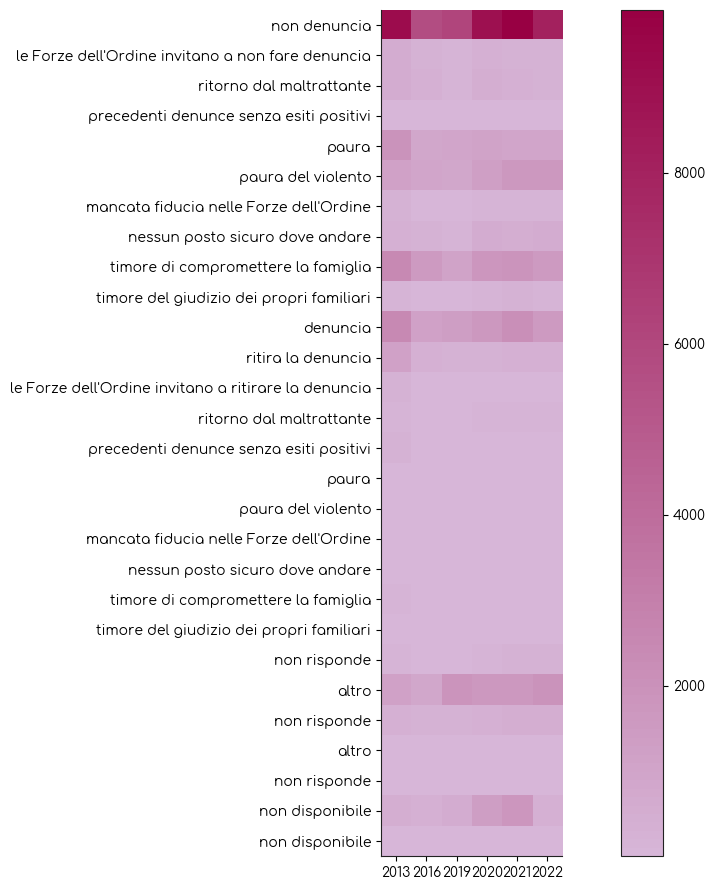

In [44]:
# crea dataset per il plot di come sono cambiati nel tempo i numeri delle denunce e del relativo
# ed eventuale ritiro
plot_ds = females[(females['TITOLO_STUDIO'] == 'ALL') & (females['DENUNCIA'] != 'ALL') &
                  (females['DENUNCIA'] != 'UNAV')].drop(columns=['TITOLO_STUDIO', 
                                                                   'Titolo di studio'])

# non sono presenti i dati di tutti gli anni per tutti i tipi di denuncia, scelgo
# di rimuovere i dati dell'anno mancante ad alcune denuncie dalle denuncie di cui ci
# sono i dati
uncomplete_years = []
for td in plot_ds['DENUNCIA'].drop_duplicates().values:
  for y in plot_ds['TIME'].drop_duplicates().values:
    if len(plot_ds[(plot_ds['DENUNCIA'] == td) & (plot_ds['TIME'] == y)]) == 0:
      plot_ds = plot_ds[plot_ds['TIME'] != y]

# crea le label per l'asse x ed y prendendo i valori univoci rispettivamente per tempo e denuncia
xlabels = plot_ds['TIME'].drop_duplicates().values
ylabels = plot_ds[plot_ds['TIME'] == 2022]['Denuncia e motivo del ritiro'].values

# creazione della matrice dei valori
marks = [plot_ds[plot_ds['DENUNCIA'] == denuncia]['Value'].values 
         for denuncia in plot_ds['DENUNCIA'].drop_duplicates().values]

# creazione plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

ax.set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax.set_yticks(np.arange(len(ylabels)), labels=ylabels)

plot = ax.imshow(marks, cmap=females_cmap, interpolation="nearest")

plt.colorbar(plot)

plt.tight_layout()
plt.show()

Bello schifo, può essere interessante mettere a confronto quante donne denunciano rispetto a quante non lo fanno:

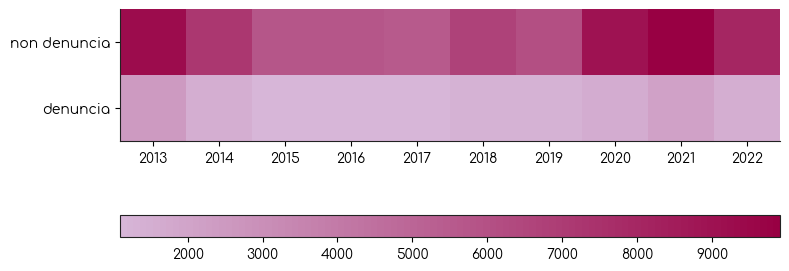

In [45]:
# costruzione dataset
rep_vs_norep = females[(females['TITOLO_STUDIO'] == 'ALL') & ((females['DENUNCIA'] == 'REPORT') |
                  (females['DENUNCIA'] == 'NOREPORT'))].drop(columns=['TITOLO_STUDIO', 'Titolo di studio'])

# creazione della matrice dei valori
marks = [rep_vs_norep[rep_vs_norep['DENUNCIA'] == denuncia]['Value'].values 
         for denuncia in rep_vs_norep['DENUNCIA'].drop_duplicates().values]

# crea le label per l'asse x ed y prendendo i valori univoci rispettivamente per tempo e denuncia
xlabels = rep_vs_norep['TIME'].drop_duplicates().values
ylabels = rep_vs_norep['Denuncia e motivo del ritiro'].drop_duplicates().values

# creazione plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax.set_yticks(np.arange(len(ylabels)), labels=ylabels)

plot = ax.imshow(marks, cmap=females_cmap, interpolation="nearest")

plt.colorbar(plot, orientation="horizontal", pad=0.2, aspect=30)

plt.tight_layout()
plt.show()

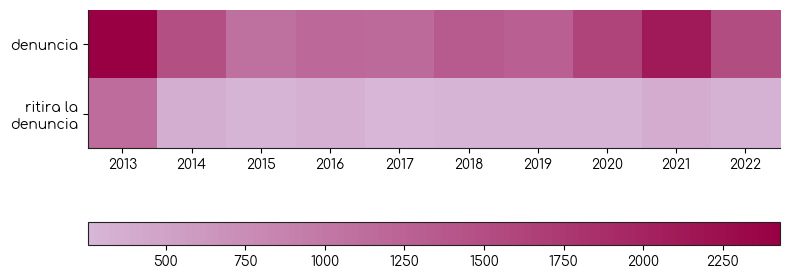

In [46]:
# costruzione dataset
rep_vs_norep = females[(females['TITOLO_STUDIO'] == 'ALL') & ((females['DENUNCIA'] == 'REPORT') |
                  (females['DENUNCIA'] == 'WITHDR_COMP'))].drop(columns=['TITOLO_STUDIO', 'Titolo di studio'])

# creazione della matrice dei valori
marks = [rep_vs_norep[rep_vs_norep['DENUNCIA'] == denuncia]['Value'].values 
         for denuncia in rep_vs_norep['DENUNCIA'].drop_duplicates().values]

# crea le label per l'asse x ed y prendendo i valori univoci rispettivamente per tempo e denuncia
xlabels = rep_vs_norep['TIME'].drop_duplicates().values
ylabels = ['denuncia', 'ritira la\ndenuncia']

# creazione plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax.set_yticks(np.arange(len(ylabels)), labels=ylabels)

plot = ax.imshow(marks, cmap=females_cmap, interpolation="nearest")

plt.colorbar(plot, orientation="horizontal", pad=0.2, aspect=30)

plt.tight_layout()
plt.show()

Può ora essere interessante mettere a confronto il numero di donne che denunciano per titolo di studio:

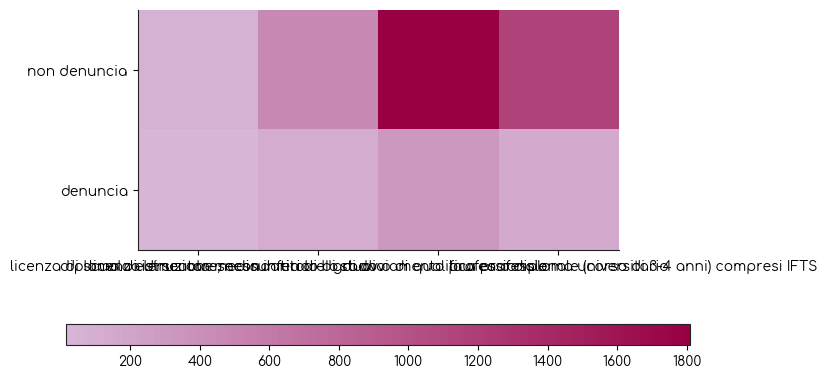

In [47]:
# costruzione dataset
rep_vs_norep = females[(females['TITOLO_STUDIO'] != 'ALL') & (females['TITOLO_STUDIO'] != 'UNAV') &
                       (females['TITOLO_STUDIO'] != 'NRP') & (females['TIME'] == 2022) &
                       ((females['DENUNCIA'] == 'REPORT') | (females['DENUNCIA'] == 'NOREPORT'))
                       ].drop(columns=['TIME'])

# ordinamento dati (da titolo di studio inferiore a maggiore)
order = {'NP': 0, 'LSE': 1, 'USE_IF': 2, 'CLF_ML': 3} 
rep_vs_norep = rep_vs_norep.sort_values(by=['TITOLO_STUDIO'], key=lambda x: x.map(order))

# crea le label per l'asse x ed y prendendo i valori univoci rispettivamente per tempo e denuncia
xlabels = rep_vs_norep['Titolo di studio'].drop_duplicates().values
ylabels = rep_vs_norep['Denuncia e motivo del ritiro'].drop_duplicates().values

# creazione della matrice dei valori
marks = [rep_vs_norep[rep_vs_norep['DENUNCIA'] == denuncia]['Value'].values 
          for denuncia in rep_vs_norep['DENUNCIA'].drop_duplicates().values]

# creazione plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax.set_yticks(np.arange(len(ylabels)), labels=ylabels)

plot = ax.imshow(marks, cmap=females_cmap, interpolation="nearest")

plt.colorbar(plot, orientation="horizontal", pad=0.2, aspect=30)

plt.tight_layout()
plt.show()

Bruttino, inverto l'asse x con l'asse y:

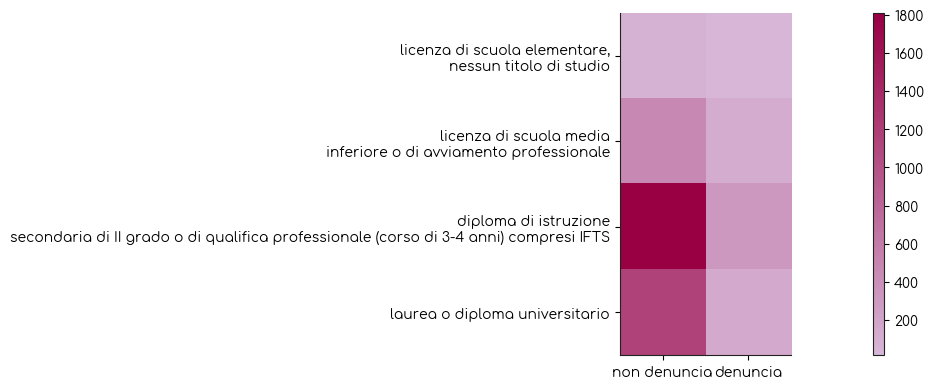

,TITOLO_STUDIO,Titolo di studio,DENUNCIA,Denuncia e motivo del ritiro,Value
2000,NP,"licenza di scuola elementare, nessun titolo di...",NOREPORT,non denuncia,53
2996,NP,"licenza di scuola elementare, nessun titolo di...",REPORT,denuncia,16
2010,LSE,licenza di scuola media inferiore o di avviame...,NOREPORT,non denuncia,464
3006,LSE,licenza di scuola media inferiore o di avviame...,REPORT,denuncia,112
1990,USE_IF,diploma di istruzione secondaria di II grado o...,NOREPORT,non denuncia,1809
2986,USE_IF,diploma di istruzione secondaria di II grado o...,REPORT,denuncia,316
2020,CLF_ML,laurea o diploma universitario,NOREPORT,non denuncia,1152
3016,CLF_ML,laurea o diploma universitario,REPORT,denuncia,137


In [48]:
# costruzione dataset
rep_vs_norep = females[(females['TITOLO_STUDIO'] != 'ALL') & (females['TITOLO_STUDIO'] != 'UNAV') &
                       (females['TITOLO_STUDIO'] != 'NRP') & (females['TIME'] == 2022) &
                       ((females['DENUNCIA'] == 'REPORT') | (females['DENUNCIA'] == 'NOREPORT'))
                       ].drop(columns=['TIME'])

# ordinamento dati (da titolo di studio inferiore a maggiore)
order = {'NP': 0, 'LSE': 1, 'USE_IF': 2, 'CLF_ML': 3} 
rep_vs_norep = rep_vs_norep.sort_values(by=['TITOLO_STUDIO'], key=lambda x: x.map(order))

# crea le label per l'asse x ed y prendendo i valori univoci rispettivamente per tempo e denuncia
ylabels = rep_vs_norep['Titolo di studio'].drop_duplicates().values
xlabels = rep_vs_norep['Denuncia e motivo del ritiro'].drop_duplicates().values

# inserisce carattere new line nelle label troppo lunghe
for lidx in range(len(ylabels)): # ciclo sugli indici delle label dell'asse y
  label = ylabels[lidx]
  char_limit = 30 # numero di caratteri consentiti per riga
  if len(label) > char_limit: # se la label ha meno di char_limit caratteri no problem
    # se ha più di char_limit caratteri cerco il primo spazio prima della parola di cui
    # fa parte il carattere alla posizione char_limit
    space_index = char_limit - label[:char_limit+1][::-1].find(' ')
    # modifico la label con la versione con la new line al posto dello spazio trovato
    ylabels[lidx] = label[:space_index] + '\n' + label[space_index+1:]

# creazione della matrice dei valori
marks = [rep_vs_norep[rep_vs_norep['TITOLO_STUDIO'] == ts]['Value'].values 
          for ts in rep_vs_norep['TITOLO_STUDIO'].drop_duplicates().values]

# creazione plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.set_xticks(np.arange(len(xlabels)), labels=xlabels)
ax.set_yticks(np.arange(len(ylabels)), labels=ylabels)

plot = ax.imshow(marks, cmap=females_cmap, interpolation="nearest")

plt.colorbar(plot, pad=0.2, aspect=30)

plt.tight_layout()
plt.show()

rep_vs_norep

Potrebbe essere interessante visualizzare quante donne sul totale che hanno subito violenza denuncia / non denuncia:

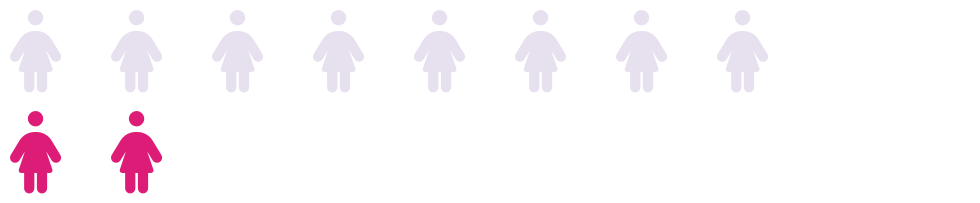

In [49]:
# costruzione dataset
waffle_data = females[(females['TITOLO_STUDIO'] == 'ALL') & (females['TIME'] == 2022) &
                       ((females['DENUNCIA'] == 'REPORT') | (females['DENUNCIA'] == 'NOREPORT'))
                       ].drop(columns=['TIME'])

denunciano = waffle_data[waffle_data['DENUNCIA'] == 'REPORT']['Value'].values[0]
non_denunciano = waffle_data[waffle_data['DENUNCIA'] == 'NOREPORT']['Value'].values[0]

data = {'non denunciano': non_denunciano / 1000, 'denunciano': denunciano / 1000} 


fig = plt.figure( 
    FigureClass=Waffle, 
    columns=10,  
    values=data,
    colors=['#e7e1ef', '#dd1c77'],
    
    block_arranging_style='new-line', 
    vertical=True, 
    icon_legend=True, 
    interval_ratio_x=1, 
    interval_ratio_y=1, 
    starting_location='NW',

    # icona della donna
    icons='person-dress', 
    icon_size=59, 
) 

plt.legend('', frameon=False) 
plt.show()

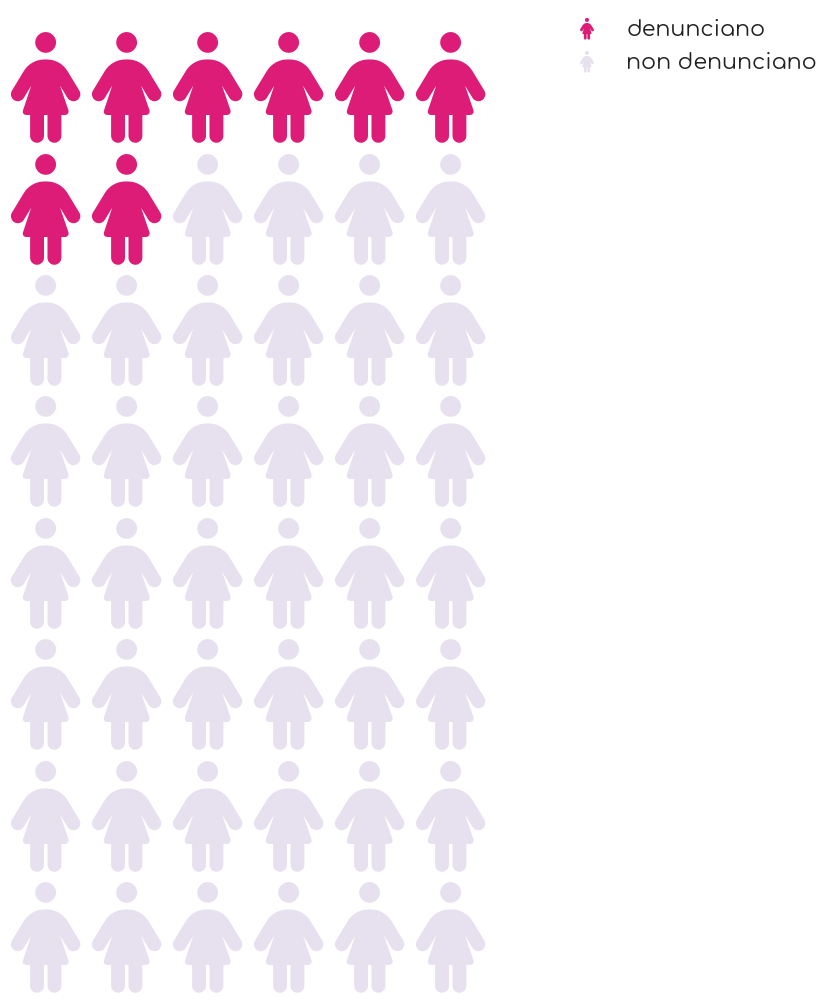

In [50]:
# costruzione dataset
waffle_data = females[(females['TITOLO_STUDIO'] == 'ALL') & (females['TIME'] == 2022) &
                       ((females['DENUNCIA'] == 'REPORT') | (females['DENUNCIA'] == 'NOREPORT'))
                       ].drop(columns=['TIME'])

denunciano = waffle_data[waffle_data['DENUNCIA'] == 'REPORT']['Value'].values[0]
non_denunciano = waffle_data[waffle_data['DENUNCIA'] == 'NOREPORT']['Value'].values[0]

data = {'denunciano': denunciano / 200, 'non denunciano': non_denunciano / 200} 

fig = plt.figure( 
    # settings
    FigureClass=Waffle, 
    columns=6,
    values=data,
    colors=['#dd1c77', '#e7e1ef'],
    vertical=True,
    interval_ratio_x=1, 
    interval_ratio_y=2, 
    starting_location='NW',

    # legenda
    icon_legend=True,
    legend={
      'loc': 'upper left',
      'bbox_to_anchor': (1.2,1.1),
      'fontsize':16,
      'shadow': False,
      'frameon': False
    },

    # icona della donna
    icons='person-dress', 
    icon_size=80, 
) 

# legenda custom
# legend_squares = [Line2D([], [], color='white', marker='s', markersize=10, markerfacecolor='green')]
# legend_labels = ['200 donne']
# # previene l'overlap della legenda con il grafico
# legend_ax = fig.add_axes([0.2, -0.1, 0.6, 0.3])  
# legend_ax.axis('off')  
# legend_ax.legend(legend_squares, legend_labels, loc='center', ncol=2, frameon=False, prop={'size': 18})
# legend_ax.set_xlim(0, 1)
# legend_ax.set_ylim(0, 1)

# plt.legend('', frameon=None)
plt.show()